In [76]:
import json

import matplotlib.pyplot as plt
from numpy import arange, average
from pandas import DataFrame, json_normalize, read_csv


In [27]:
def read_log_file(filepath) -> DataFrame:
    with open(filepath, "r") as f:
        lines = f.readlines()
    return json_normalize([json.loads(line) for line in lines])

In [40]:
test = read_csv("../data/PAMAP2/y_train_data.csv")
x_label = [f"{num[0]}" for num in test.value_counts().index.sort_values().to_list()][1:]

df_grid = read_log_file("../reports/logs_normal.log")
new_avgs = [
    average(df_grid["target"][idx : idx + 4]) for idx in range(0, df_grid.shape[0], 4)
]
results_grid = [
    average(new_avgs[idx : idx + 30]) for idx in range(0, len(new_avgs), 30)
]

df_bayesian = read_log_file("../reports/logs_bayesian.log")
results_bayesian = [df_bayesian["target"][:30].max()]
for idx in range(30, 80, 5):
    results_bayesian.append(df_bayesian["target"][idx : idx + 5].max())

df_rand = read_log_file("../reports/logs_normal_rand.log")
rand_avgs = [
    average(df_rand["target"][idx : idx + 4]) for idx in range(0, df_rand.shape[0], 4)
]
results_rand = [
    average(rand_avgs[idx : idx + 11]) for idx in range(0, len(rand_avgs), 11)
]

In [67]:
results_rand[10]

np.float64(0.3660861583642744)

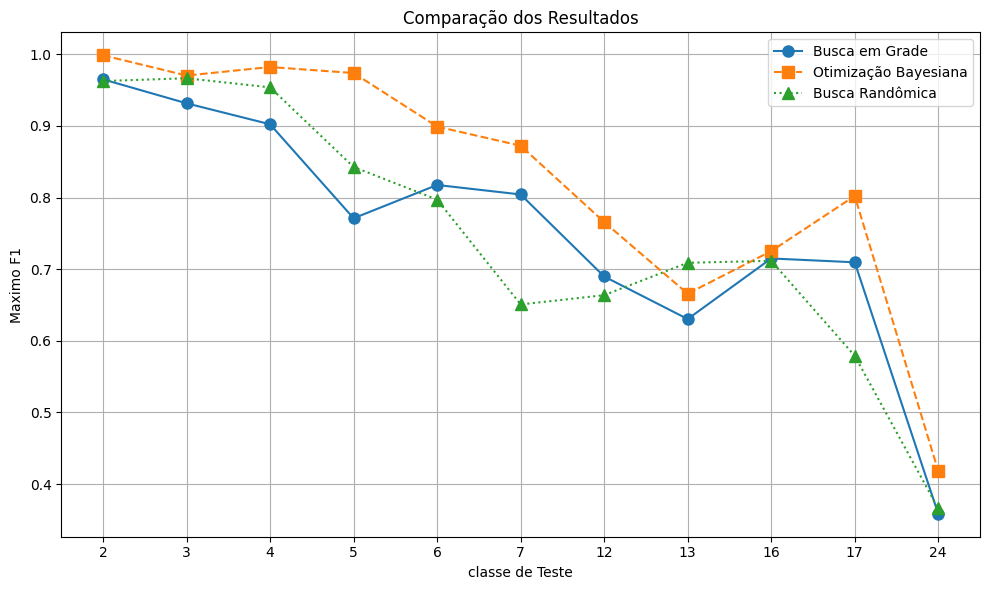

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(
    x_label,
    results_grid,
    marker="o",
    linestyle="-",
    markersize=8,
    label="Busca em Grade",
)
plt.plot(
    x_label,
    results_bayesian,
    marker="s",
    linestyle="--",
    markersize=8,
    label="Otimização Bayesiana",
)
plt.plot(
    x_label,
    results_rand,
    marker="^",
    linestyle=":",
    markersize=8,
    label="Busca Randômica",
)

plt.xlabel("classe de Teste")
plt.ylabel("Maximo F1")
plt.title("Comparação dos Resultados")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [74]:
data = {
    "Grid & Random Search": {
        "0.2": {
            "f1": 0.9624018304372024,
            "mcc": 0.7992107406007671,
            "acc": 0.9375519972062736,
            "pr_auc": 0.9638151057878853,
            "roc_auc": 0.8446039748378866,
        },
        "0.55": {
            "f1": 0.9329543842584149,
            "mcc": 0.7886818386443517,
            "acc": 0.9040764257342495,
            "pr_auc": 0.9371975604537359,
            "roc_auc": 0.8558281830604354,
        },
        "0.8": {
            "f1": 0.8472473033132792,
            "mcc": 0.6351594546240872,
            "acc": 0.799710036656938,
            "pr_auc": 0.8675051882606968,
            "roc_auc": 0.7746702254535782,
        },
    },
    "Bayesian Optimization": {
        "0.2": {
            "f1": 0.8834170364230338,
            "mcc": 0.6009691327296716,
            "acc": 0.8231754102149295,
            "pr_auc": 0.9821743705803118,
            "roc_auc": 0.8891180953992274,
        },
        "0.55": {
            "f1": 0.8528276556469206,
            "mcc": 0.7262537695168911,
            "acc": 0.8465885323577953,
            "pr_auc": 0.9415321071537528,
            "roc_auc": 0.8675367173547908,
        },
        "0.8": {
            "f1": 0.8271294230042564,
            "mcc": 0.7203130071647301,
            "acc": 0.8451502069176927,
            "pr_auc": 0.9204310110450742,
            "roc_auc": 0.849631377607955,
        },
    },
}


In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

for i, technique in enumerate(list(data.keys())):
    for metric in list(data["Grid & Random Search"]["0.2"].keys()):
        axes[i].plot(
            percentages := list(data["Grid & Random Search"].keys()),
            [data[technique][p][metric] for p in percentages],
            marker="o",
            label=metric,
        )
    axes[i].set_ylabel("Scores" if i == 0 else "")
    axes[i].set_xlabel("Percentage")  # Label x-axis as Percentage
    axes[i].set_title(technique)
    axes[i].tick_params(axis="x", rotation=0)
    axes[i].legend(loc="upper right")

fig.suptitle("Performance Metrics by Percentage and Optimization Method", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

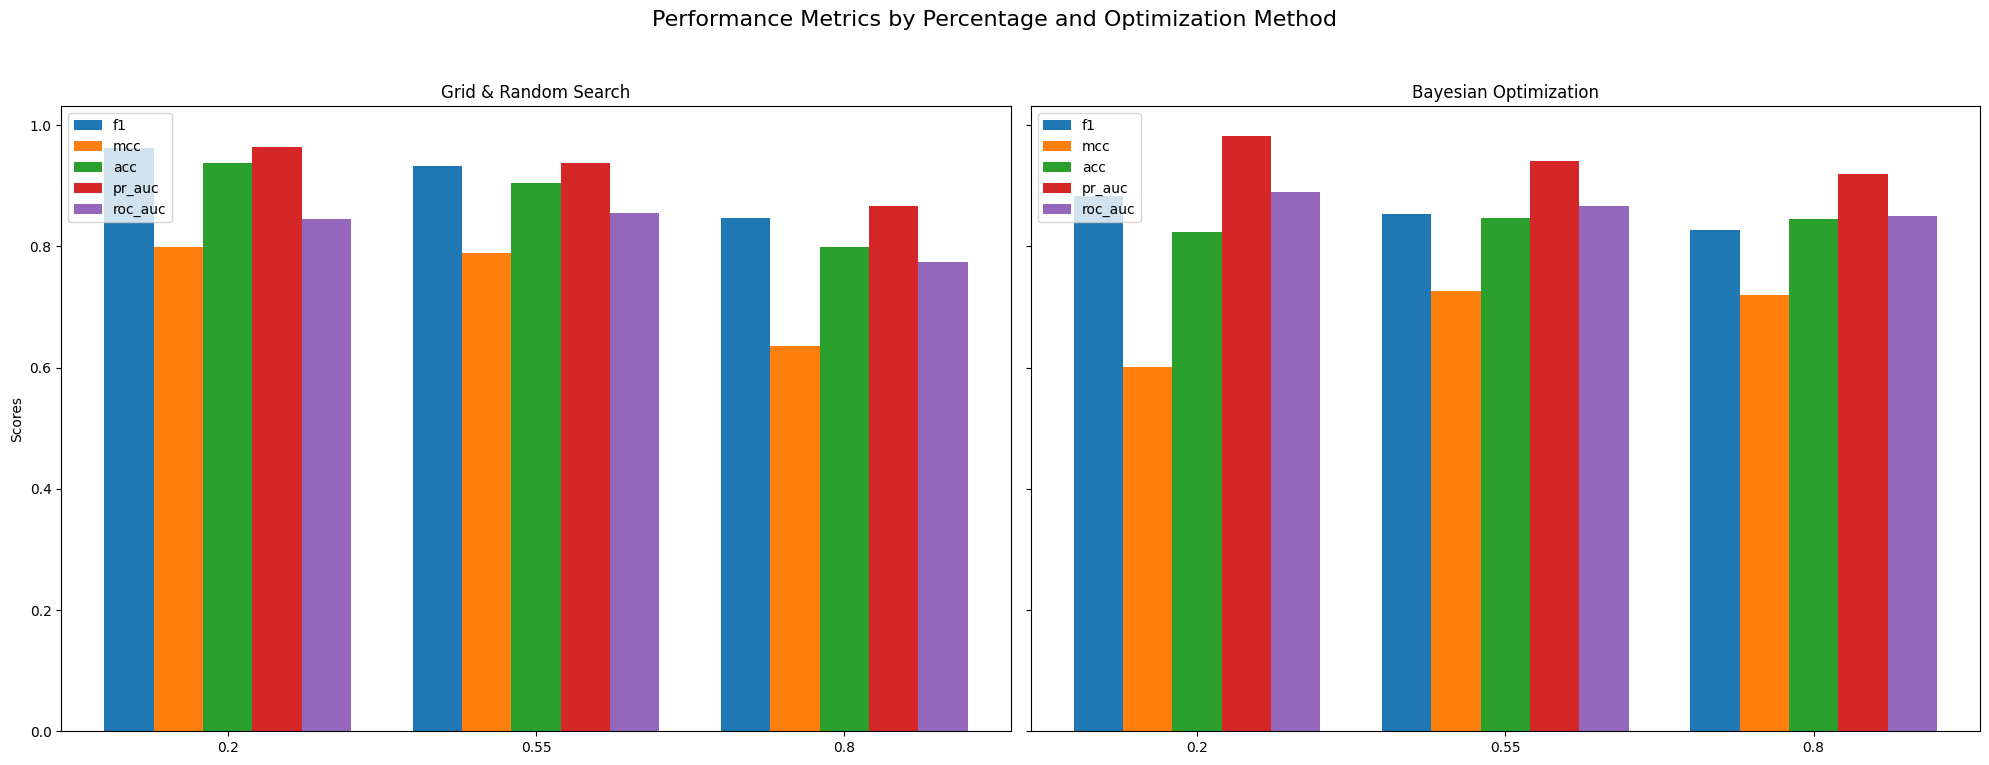

In [78]:
percentages = list(data["Grid & Random Search"].keys())
metrics = list(data["Grid & Random Search"]["0.2"].keys())

# sharey=True for same y-axis scale
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True)

for i, technique in enumerate(list(data.keys())):
    x = arange(len(percentages))
    for j, metric in enumerate(metrics):
        axes[i].bar(
            x + (j - len(metrics) / 2 + 0.5) * (width := 0.8 / len(metrics)),
            [data[technique][p][metric] for p in percentages],
            width,
            label=metric,
        )
    axes[i].set_ylabel("Scores" if i == 0 else "")
    axes[i].set_title(technique)
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(percentages)
    axes[i].tick_params(axis="x", rotation=0)
    if i == 0:
        axes[i].legend(loc="upper left")
    else:
        axes[i].legend(loc="upper left")

fig.suptitle("Performance Metrics by Percentage and Optimization Method", fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()